In [6]:
!pip install folium

     |████████████████████████████████| 102kB 7.3MB/s ta 0:00:011


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [18]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890


In [22]:

body = client_59f7849bbe514d92b6ee1c0d14d38e9b.get_object(Bucket='capstoneweek1-donotdelete-pr-nquxbmeplf6mar',Key='PopulationData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bangalore_population = pd.read_csv(body)
bangalore_population.head()


,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [24]:

body = client_59f7849bbe514d92b6ee1c0d14d38e9b.get_object(Bucket='capstoneweek1-donotdelete-pr-nquxbmeplf6mar',Key='incomeData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bangalore_income = pd.read_csv(body)
bangalore_income.head()


,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [25]:
bangalore_latitude = df_data_1['Latitude'].mean()
bangalore_longitude = df_data_1['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [26]:
CLIENT_ID = 'JOIIRFTJANCSBRXYYPAPY0NXUDWT0MZS4Y4ONPELCQDY5FWM'
CLIENT_SECRET = '4RFNYCEPR52INJQR5XGKCHY3LQVL3B4OBXMHIEITS0TX3JXA'
VERSION = '20180606'
LIMIT = 150

In [27]:
unique_boroughs_of_bangalore = df_data_1['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [28]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [29]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [31]:
for lat,lng,boro,nei in zip(df_data_1['Latitude'],
                           df_data_1['Longitude'],
                           df_data_1['Borough'],
                           df_data_1['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [32]:
bangalore_map

## Exploring bangalore Neighborhoods using FourSquare API

In [38]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [39]:
bangalore_venues = getNearbyVenues(names=df_data_1['Neighborhoods'],latitudes=df_data_1['Latitude'],longitudes=df_data_1['Longitude'],boro=df_data_1['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [40]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  593


In [41]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Hotel Bangalore Gate,12.973507,77.579144,Hotel


In [42]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)


Venue Category
Indian Restaurant       110
Fast Food Restaurant     31
Café                     31
Bakery                   25
Department Store         20
Ice Cream Shop           20
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       15
Hotel                    14
Name: Neighborhood, dtype: int64

In [43]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  127


In [44]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [45]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             6
                Domlur                     11
                Indiranagar                64
                Jeevanbheemanagar           6
                Malleswaram                 8
                Pete area                   3
                Rajajinagar                10
                Sadashivanagar             22
                Seshadripuram               9
                Shivajinagar               11
                Ulsoor                      4
                Vasanth Nagar              27
Eastern         Bellandur                  27
                CV Raman Nagar              6
                Hoodi                       4
                Krishnarajapuram            2
                Mahadevapura                5
                Marathahalli                4
                Varthur                     1
                Whitefield                  8
NorthEastern    Banaswadi                   6
                HBR Layout                  5
                Horamavu                    1
                Kammanahalli               11
                Lingarajapuram              2
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  13
                R. T. Nagar                 8
...                                       ...
                Yeshwanthpur                8
SouthEastern    BTM Layout                 36
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             5
                HSR Layout                 11
                Koramangala                 6
                Madiwala                   23
Southern        Banashankari                8
                Basavanagudi               10
                Girinagar                   3
                J. P. Nagar                22
                Jayanagar                  16
                Kumaraswamy Layout         12
                Padmanabhanagar             4
                Uttarahalli                13
SouthernSuburbs Anjanapura                  1
                Arekere                    26
                Begur                       4
                Gottigere                   5
                Hulimavu                    4
                Kothnur                     5
Western         Basaveshwaranagar          21
                Kamakshipalya               3
                Kengeri                     6
                Mahalakshmi Layout         11
                Nagarbhavi                  8
                Nayandahalli                4
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[61 rows x 1 columns]

In [46]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [47]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [48]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,6
1,Central,Domlur,11
2,Central,Indiranagar,64
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,8
5,Central,Pete area,3
6,Central,Rajajinagar,10
7,Central,Sadashivanagar,22
8,Central,Seshadripuram,9
9,Central,Shivajinagar,11


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasandra'),
 Text(0, 0, 'Electronic 

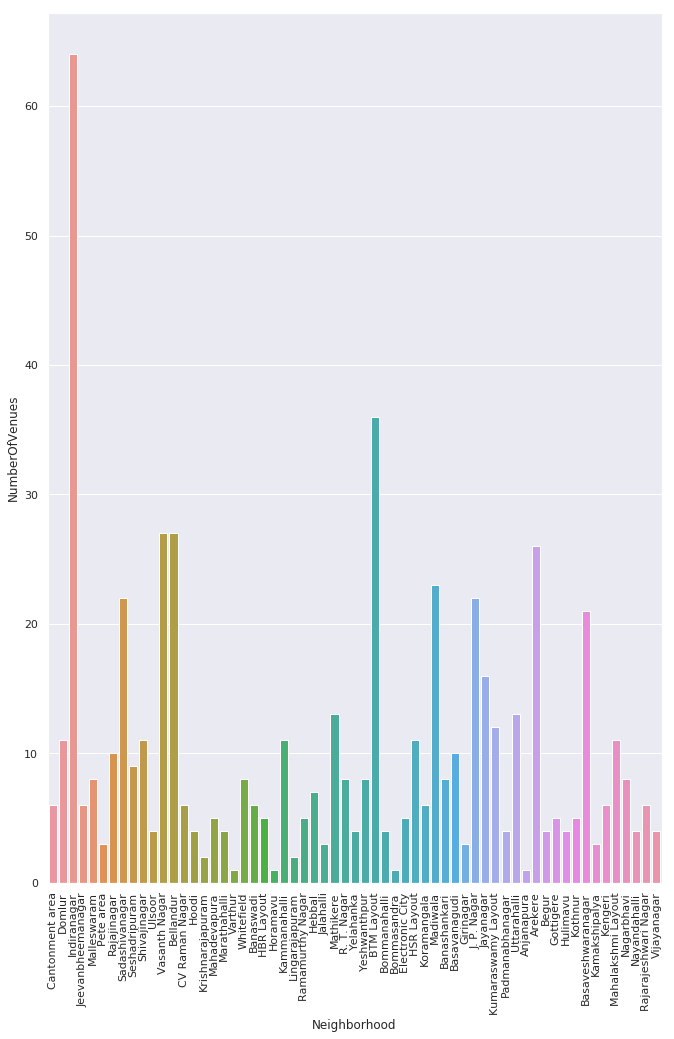

In [49]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [50]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
230,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
231,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
232,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
233,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
234,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
235,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
236,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
237,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [51]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [52]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
1,Arekere,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.000000,0.038462,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
2,BTM Layout,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055556,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.00
3,Banashankari,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
4,Banaswadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,...,0.166667,0.000000,0.00,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.00
5,Basavanagudi,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
6,Basaveshwaranagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.047619,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
7,Begur,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
8,Bellandur,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
9,Bommanahalli,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00


In [55]:
number_of_top_venues = 5
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                               Venue  Frequency
0                 Venue Category_ATM        1.0
1  Venue Category_Mughlai Restaurant        0.0
2         Venue Category_Pizza Place        0.0
3            Venue Category_Pharmacy        0.0
4           Venue Category_Pet Store        0.0


--------- Arekere ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.23
1   Venue Category_Sporting Goods Shop       0.15
2           Venue Category_Pizza Place       0.08
3  Venue Category_Gym / Fitness Center       0.04
4              Venue Category_Bus Line       0.04


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.19
1        Venue Category_Ice Cream Shop       0.08
2    Venue Category_Chinese Restaurant       0.08
3           Venue Category_Snack Place       0.08
4  Venue Category_Fast Food Restaurant       0.06


--------- Banash

In [56]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [57]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,Venue Category_Business Service
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Sandwich Place
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Market,Venue Category_Tea Room,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store


In [58]:
neighborhoods_venues_sorted.shape

(61, 11)

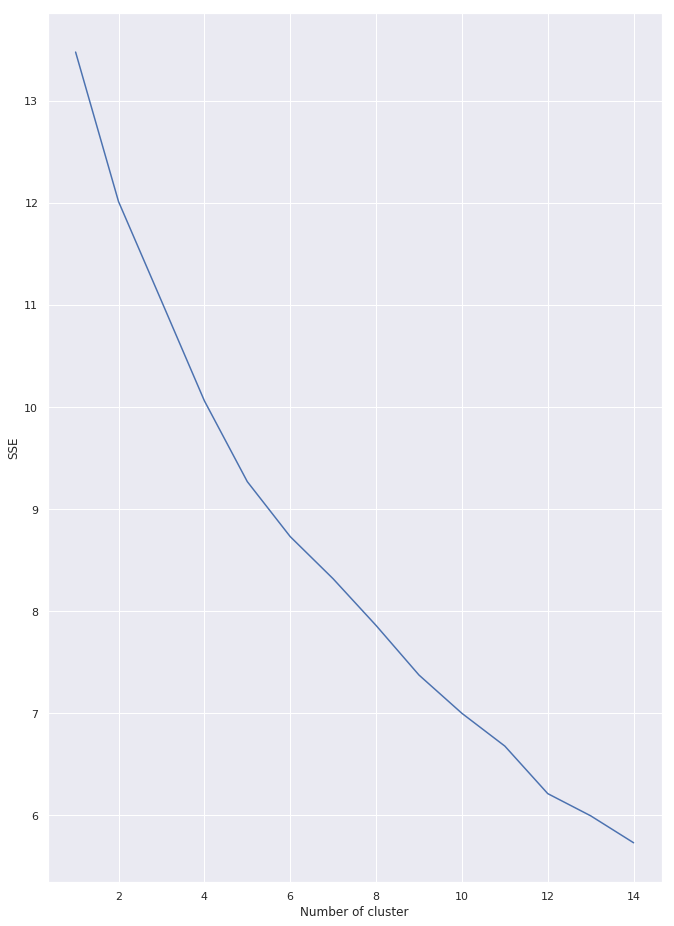

In [59]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [60]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [61]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [62]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [63]:

bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    16
1     3
2     6
3    28
4     8
Name: Neighborhood, dtype: int64

In [64]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=129)

In [65]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [66]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Department Store,Venue Category_Neighborhood,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,3
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [67]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [68]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [69]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [70]:
map_clusters

In [71]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [72]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [73]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [74]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [75]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [76]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [77]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    1
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 61, dtype: uint8

In [78]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [79]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [80]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [81]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [82]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [83]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [84]:

target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [85]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,573,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,574,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,575,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,576,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,577,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,578,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
6,579,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
7,580,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Market,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [86]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [87]:
target_cluster

0

In [88]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
63,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
64,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
65,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
66,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0,Southern,12.9255,77.5468,Reliance Trends,12.926891,77.551068,Clothing Store
67,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,0.0,0.0,0,Southern,12.9255,77.5468,Cafe coffee day,12.926020,77.550306,Café


In [89]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 170 neighborhoods which has similar characteristics to Whitefield.


In [90]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,63,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Anna Kuteera,12.926094,77.550367,Indian Restaurant
1,64,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,cafe coffee day,12.924896,77.545873,Café
2,65,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Pizza Hut,12.924959,77.550755,Pizza Place
3,66,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Reliance Trends,12.926891,77.551068,Clothing Store
4,67,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0,Southern,12.9255,77.5468,Cafe coffee day,12.926020,77.550306,Café


In [91]:

possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [92]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [93]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,Anna Kuteera,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0
1,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,cafe coffee day,12.924896,77.545873,Café,810407,0.823908,57524.20953,0.889855,0,1.0
2,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,Pizza Hut,12.924959,77.550755,Pizza Place,810407,0.823908,57524.20953,0.889855,0,1.0
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,Reliance Trends,12.926891,77.551068,Clothing Store,810407,0.823908,57524.20953,0.889855,0,1.0
4,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,Cafe coffee day,12.926020,77.550306,Café,810407,0.823908,57524.20953,0.889855,0,1.0


In [94]:

possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [95]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
1,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,12.926069,77.550560,North Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
2,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,12.926899,77.550973,Shoe Store,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
3,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,12.925043,77.550906,Sporting Goods Shop,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
4,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Shoe Store,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Falafel Restaurant,Venue Category_Fish & Chips Shop,...,12.924896,77.545873,Café,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403


In [96]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [97]:
top3_df = pd.DataFrame(top3).reset_index()

In [98]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Indian Restaurant,[0.8234029969298623]
1,Electronic City,Venue Category_Furniture / Home Store,Venue Category_Bus Stop,Venue Category_Outlet Store,[0.5423513638776338]
2,Girinagar,Venue Category_Ice Cream Shop,Venue Category_Park,Venue Category_Bus Station,[0.7210681221537589]


### we see that 'Banashankari,Electronic City and Girinagar' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !